Forward / backward resolved scattering
=========================================

In this example, we try to reproduce the directional visible light scattering from silicon spheres, reported by *Fu et al.* [1].



[1]: Fu, Y. H. et al.: *Directional visible light scattering by silicon nanoparticles*. **Nat Commun** 4, 1527 (2013) (https://doi.org/10.1038/ncomms2538)


In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt

Setting up the simulation
--------------------------------

In [2]:
## --- Setup incident field
field_generator = fields.planewave
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 30))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## --- Setup geometry (sphere D=150nm in vacuum)
scale_factor = 1.4
step = 18.75/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)

material = materials.silicon()
n1, n2 = 1.0, 1.0     # vacuum env.

struct = structures.struct(step, geometry, material, n1,n2, 
                                   structures.get_normalization('hex'))


sim = core.simulation(struct, efield)

Run the simulation, get FW/BW scattering spectra
-------------------------------------------------

At first we run the main simulation *core.scatter*, then we calculate the scattering to the farfield separately for the upper and lower hemi-sphere:

In [3]:
## main simulation
E = core.scatter(sim, method='lu', verbose=True)

## FW and BW scattering spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, scat_fw = tools.calculate_spectrum(sim, field_kwargs, linear.farfield, 
                                      tetamin=np.pi/2., tetamax=np.pi, 
                                      return_value='int_Es')
wl, scat_bw = tools.calculate_spectrum(sim, field_kwargs, linear.farfield, 
                                      tetamin=0, tetamax=np.pi/2., 
                                      return_value='int_Es')

timing 300.00nm:     1280.4 ms
timing 312.72nm:     1264.3 ms
timing 325.97nm:     1100.5 ms
timing 339.79nm:     1174.2 ms
timing 354.20nm:     1098.9 ms
timing 369.21nm:     1091.6 ms
timing 384.86nm:     1145.5 ms
timing 401.17nm:     1090.4 ms
timing 418.18nm:     1204.7 ms
timing 435.91nm:     1307.4 ms
timing 454.39nm:     1121.6 ms
timing 473.65nm:     1104.6 ms
timing 493.72nm:     1322.0 ms
timing 514.65nm:     1219.0 ms
timing 536.47nm:     1520.8 ms
timing 559.21nm:     1103.9 ms
timing 582.92nm:     1396.4 ms
timing 607.63nm:     1411.1 ms
timing 633.38nm:     1105.0 ms
timing 660.23nm:     1129.2 ms
timing 688.22nm:     1653.1 ms
timing 717.39nm:     1199.5 ms
timing 747.80nm:     1326.8 ms
timing 779.50nm:     1351.2 ms
timing 812.55nm:     1342.0 ms
timing 846.99nm:     1305.0 ms
timing 882.90nm:     1280.7 ms
timing 920.32nm:     1415.4 ms
timing 959.33nm:     1179.2 ms
timing 1000.00nm:     1129.0 ms


Plot the FW/BW spectra
---------------------------

Let's see what scattering we get in both directions:

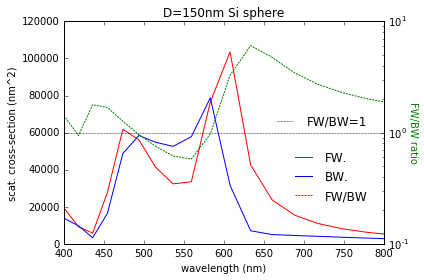

In [4]:
plt.figure()
plt.title(r"D=150nm Si sphere")

## --- scattering spectra FW & BW
plt.plot(wl, scat_fw, 'r', label='FW.')
plt.plot(wl, scat_bw, 'b', label='BW.')

plt.xlabel("wavelength (nm)")
plt.ylabel(r"scat. cross-section (nm^2)")
plt.xlim(400,800)

plt.plot([0], [0], color='g', dashes=[2,1], label='FW/BW')  # for legend entry
plt.legend(loc='center', frameon=False, ncol=1, bbox_to_anchor=(0.83, 0.3))


## --- logscale FW/BW ratio on right y-axis
plt.twinx()
plt.plot(wl, scat_fw/scat_bw, color='g', dashes=[2,1])
plt.plot([400,800], [1,1], color='k', lw=0.5, dashes=[2,1], label='FW/BW=1')

plt.ylabel(r"FW/BW ratio", rotation=270, labelpad=8, color='g')
plt.yscale('log')
plt.xlim( [400, 800] )
plt.ylim( [0.1, 10] )
plt.legend(loc='center', frameon=False, ncol=1, bbox_to_anchor=(0.8, 0.55))


plt.tight_layout()
plt.show()

Comparing this with the paper [1], cited at the very top, this looks pretty much exactly like their results (a bit less smooth of course...).